# Freesound pitch estimation assessment
In this document the results of the assessment of the Freesound pitch estimation algorithm will be presented and discussed.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from loadResults import *  # load results
import pEstAssess as pa    # some functions to mangle the results


## 1: Method
The pitch estimation is assessed in two different manners: one uses the data calculated by Freesound at the moment a sound is uploaded; the other will be using the data calculated locally after downloading sounds from both Freesound and other sources.

### 1.1: The sounds
The sounds that are used come, as stated above, from Freesound and some non-Freesound sources. The sounds used from Freesound come from three different sources: the users Carlos Vaquero and Modular Samples and; the soundpacks containing the tag: 'good-sounds'. The non-Freesound sounds come from sources mentioned in the masterthesis '$TITLE$' of Carlos Vaquero [$REF$], namely sounds from the Philharmonia Orchestra [$REF$] and the piano pack from The University of Iowa Musical Instrument Samples (or as they call it MIS) [$REF$]. 

### 1.1.1: Contents of the soundpacks:
All of the sounds are single-note sounds from either instruments or synthesisers. The sounds from the user Carlos Vaquero are recordings from different western instruments containing for example: acoustic guitar, recorders, bassoon, several bowed instruments (played plucked, bowed and with different bowing techniques). The sounds with the tag good-sounds are also single-notes of several western instruments, but only played with a 'normal' playing technique. The sounds from the user Modular Samples are all single notes played on a digital synthesiser using different presets.
The sounds from the Philharmonia Orchestra are several (vast) collections of sounds from different instruments, played in a wide range of manners, of the orchestra. The sounds chosen here are the cello, clarinet, guitar and violin. The sounds from 
the University of IOWA contain soudns from a piano, cello, trumpet, marimba and xylophone.

Below the amount of sounds contained in each pack is shown.

In [2]:
print "Amount of sounds per source:"
print "Freesound:"
print "\tCarlos Vaquero:\t\t" + str(csJ_N) + " sounds"
print "\tgood-sounds:\t\t" + str(gsJ_N) + " sounds"
print "\tModular Samples:\t" + str(msJ_N) + " sounds"
print "\tTotal:\t\t\t" + str(csJ_N + gsJ_N + msJ_N) + " sounds\n"

print "non-Freesound:"
print "\tPhilharmonia:\t\t" + str(phE_N) + " sounds"
print "\tIOWA:\t\t\t" + str(iwE_N) + " sounds"
print "\tTotal:\t\t\t" + str(phE_N + iwE_N) + " sounds\n"

print "Total sounds:\t\t\t" + str(csJ_N + gsJ_N + msJ_N +phE_N + iwE_N) + " sounds\n"

Amount of sounds per source:
Freesound:
	Carlos Vaquero:		470 sounds
	good-sounds:		113 sounds
	Modular Samples:	7112 sounds
	Total:			7695 sounds

non-Freesound:
	Philharmonia:		3343 sounds
	IOWA:			639 sounds
	Total:			3982 sounds

Total sounds:			11677 sounds



### 1.1.2: Sampling of the soundpacks:
What clearly stands out is that most of the sounds come from the user Modular Samples and the Philharmonia library. As the results of the pitch estimation can be dependent on the characteristics of the types of sounds and the manner in which they are recorded, the results can be influenced heavily by the characteristics and recording manner of these sounds. For this reason the error values of the Modular Samples and Philharmonia sounds will be averaged over several samples taken from all their sounds.

# $DO-THE-SAMPLING$


## 1.2: Assessment
The Freesound pitch estimation is done using the pitchYinFFT algorithm contained in the Essentia library [$REF$]. The pitchYinFFT is a optimalisation for reduced calculation time of the YIN algorithm. The performance of the pitch estimation algortihm will be assessed by comparing the pitch estimated by the algorithm against the pitch annotated for that sound, taken either from the filename of the descriptions and/or tags of the sounds.

# 2: Results
Firstly the results of the local calculation of the pitches will be compared with the data calculated by Freesound. Seconly, the correctness of the pitch estimations will be investigated  Lastly some possible factors which can predict the correctness of the estimation will be discussed, thus investigating possible improvements. The confidence measurements from the pitchYinFFT algorithm and the annotated pitches will be compared to the succes of the estimations and the values of some aural and musical descriptors will be correlated to the error values obtained in the assessment.


## 2.1: Comparison of Freesound and locally calculated data
The data is computated locally, trying to reproduce the data obtained from Freesound. The method used at uploadtime in Freesound is reproduced locally. Ideally the values obtained trough local calculation and central calculation at uploadtime will be the same, although some small differences may occur. Below are the differences obtained between the Freesounddata and the locally calculated data.

In [3]:
# compare Freesound data and locally calculated data:
print "Freesound data versus local conmputed data:"
print "Total difference in annotated pitches:\t" + str(np.sum(abs(frsJSON_pTag - frsESS_pTag))) + " Hz\n" # check whether the order of the sound is the same.

print "Mean estimated pitches:\n\tFreesound: " + str(np.mean(frsJSON_pEst)) + "Hz\tLocal: " + str(np.mean(frsESS_pEst)) + "Hz"
print "Mean confidence:\n\tFreesound: " + str(np.mean(frsJSON_conf)) + "\tLocal: " + str(np.mean(frsESS_conf))
print "Mean salience:\n\tFreesound: " + str(np.mean(frsJSON_sal)) + "\tLocal: " + str(np.mean(frsESS_sal))
print "Mean ERB distance:\n\tFreesound: " + str(np.mean(abs(frsJSON_ERB))) + " ERBs\tLocal: " + str(np.mean(abs(frsESS_ERB))) + " ERBs"
print "Mean semitone distance:\n\tFreesound: " + str(np.mean(abs(frsJSON_st))) + " st.\tLocal: " + str(np.mean(abs(frsESS_st))) + " st.\n"


print "Mean difference in estimated pitches:\t" + str(np.mean(abs(frsJSON_pEst - frsESS_pEst))) + " Hz" + ",\t(σ: " + str(np.std(abs(frsJSON_pEst - frsESS_pEst))) + " Hz)"
print "Mean difference in confidence:\t\t" + str(np.mean(abs(frsJSON_conf - frsESS_conf))) + ",\t(σ: " + str(np.std(abs(frsJSON_conf - frsESS_conf))) + ")"
print "Mean difference in salience:\t\t" + str(np.mean(abs(frsJSON_sal - frsESS_sal))) + ",\t(σ: " + str(np.std(abs(frsJSON_conf - frsESS_conf))) + ")"
frsJSON_ERB = pa.ERBdist(frsJSON_pTag, frsJSON_pEst); frsESS_ERB = pa.ERBdist(frsESS_pTag, frsESS_pEst);
print "Mean difference in ERB distance:\t" + str(np.mean(abs(frsJSON_ERB - frsESS_ERB))) + ",\t\t(σ: " + str(np.std(abs(frsJSON_ERB - frsESS_ERB))) + ")"
frsJSON_st = pa.semitoneDist(frsJSON_pTag, frsJSON_pEst); frsESS_st = pa.semitoneDist(frsESS_pTag, frsESS_pEst);
print "Mean difference in semitone distance:\t" + str(np.mean(abs(frsJSON_st - frsESS_st))) + ",\t\t(σ: " + str(np.std(abs(frsJSON_st - frsESS_st))) + ")\n"

print "Minimal and maximal values:"
print "Estimated pitches:"
print "\tFreesound:\t[" + str(min(frsJSON_pEst)) + "Hz, " + str(max(frsJSON_pEst)) + "Hz]"
print "\tLocal:\t\t[" + str(min(frsESS_pEst)) + "Hz, " + str(max(frsESS_pEst)) + "Hz]"
print "Confidences:"
print "\tFreesound:\t[" + str(min(frsJSON_conf)) + "Hz, " + str(max(frsJSON_conf)) + "Hz]"
print "\tLocal:\t\t[" + str(min(frsESS_conf)) + "Hz, " + str(max(frsESS_conf)) + "Hz]"
print "Saliences:"
print "\tFreesound:\t[" + str(min(frsJSON_sal)) + "Hz, " + str(max(frsJSON_sal)) + "Hz]"
print "\tLocal:\t\t[" + str(min(frsESS_sal)) + "Hz, " + str(max(frsESS_sal)) + "Hz]"

Freesound data versus local conmputed data:
Total difference in annotated pitches:	0.0 Hz

Mean estimated pitches:
	Freesound: 502.847006379Hz	Local: 489.411388006Hz
Mean confidence:
	Freesound: 0.721313577325	Local: 0.734029321743
Mean salience:
	Freesound: 0.457803061152	Local: 0.456975001527


NameError: name 'frsJSON_ERB' is not defined

In [4]:
print "Mean estimated pitch difference per pack:"
print "Carlos:\t\t\t" + str(np.mean(abs(csJ_pEst - csE_pEst))) + " Hz" + ",\t(σ: " + str(np.std(abs(csJ_pEst - csE_pEst))) + " Hz)"
print "Good-sounds:\t\t" + str(np.mean(abs(gsJ_pEst - gsE_pEst))) + " Hz" + ",\t(σ: " + str(np.std(abs(gsJ_pEst - gsE_pEst))) + " Hz)"
print "Modular Samples:\t" + str(np.mean(abs(msJ_pEst - msE_pEst))) + " Hz" + ",\t(σ: " + str(np.std(abs(msJ_pEst - msE_pEst))) + " Hz)\n"

print "Mean confidence difference per pack:"
print "Carlos:\t\t\t" + str(np.mean(abs(csJ_conf - csE_conf))) + ",\t(σ: " + str(np.std(abs(csJ_conf - csE_conf))) + ")"
print "Good-sounds:\t\t" + str(np.mean(abs(gsJ_conf - gsE_conf))) + ",\t\t(σ: " + str(np.std(abs(gsJ_conf - gsE_conf))) + ")"
print "Modular Samples:\t" + str(np.mean(abs(msJ_conf - msE_conf))) + ",\t\t(σ: " + str(np.std(abs(msJ_conf - msE_conf))) + ")\n"

print "Mean salience difference per pack:"
print "Carlos:\t\t\t" + str(np.mean(abs(csJ_sal - csE_sal))) + ",\t(σ: " + str(np.std(abs(csJ_sal - csE_sal))) + ")"
print "Good-sounds:\t\t" + str(np.mean(abs(gsJ_sal - gsE_sal))) + ",\t(σ: " + str(np.std(abs(gsJ_sal - gsE_sal))) + ")"
print "Modular Samples:\t" + str(np.mean(abs(msJ_sal - msE_sal)))+ ",\t(σ: " + str(np.std(abs(msJ_sal - msE_sal))) + ")\n"

print "Mean ERB distance per pack:"
csJ_ERB = pa.ERBdist(csJ_pTag, csJ_pEst); csE_ERB = pa.ERBdist(csE_pTag, csE_pEst);
print "Carlos:\t\t\t" + str(np.mean(abs(csJ_ERB - csE_ERB))) + ",\t\t(σ: " + str(np.std(abs(csJ_ERB - csE_ERB))) + ")"
gsJ_ERB = pa.ERBdist(gsJ_pTag, gsJ_pEst); gsE_ERB = pa.ERBdist(gsE_pTag, gsE_pEst);
print "Good-sounds:\t\t" + str(np.mean(abs(gsJ_ERB - gsE_ERB))) + ",\t\t(σ: " + str(np.std(abs(gsJ_ERB - gsE_ERB))) + ")"
msJ_ERB = pa.ERBdist(msJ_pTag, msJ_pEst); msE_ERB = pa.ERBdist(msE_pTag, msE_pEst);
print "Modular Samples:\t" + str(np.mean(abs(msJ_ERB - msE_ERB))) + ",\t\t(σ: " + str(np.std(abs(msJ_ERB - msE_ERB))) + ")\n"


Mean estimated pitch difference per pack:
Carlos:			12.6963153164 Hz,	(σ: 21.3211130282 Hz)
Good-sounds:		14.4762112202 Hz,	(σ: 16.5183777651 Hz)
Modular Samples:	54.5561234251 Hz,	(σ: 226.605714108 Hz)

Mean confidence difference per pack:
Carlos:			0.0155595533406,	(σ: 0.0108698961299)
Good-sounds:		0.012901073966,		(σ: 0.00954355398069)
Modular Samples:	0.017030749374,		(σ: 0.0154209541027)

Mean salience difference per pack:
Carlos:			0.0165195327063,	(σ: 0.0193645125788)
Good-sounds:		0.0164239860916,	(σ: 0.0202735816666)
Modular Samples:	0.0296465692053,	(σ: 0.0403292301654)

Mean ERB distance per pack:
Carlos:			0.442553191489,		(σ: 0.819897419855)
Good-sounds:		0.46017699115,		(σ: 0.678825094186)
Modular Samples:	1.15902699663,		(σ: 3.28015860106)



The data obtained from Freesound and the locally computated data are similar enough to focus on the locally computed data in the rest of the assessment.

## 2.2: Pitch assessment
### 2.2.1: Mean errors:
The error is calculated by subtracting the estimated pitch from the annotated pitch.

Mean error: -398.121681563 Hz,	(σ: 1495.70035375 Hz)


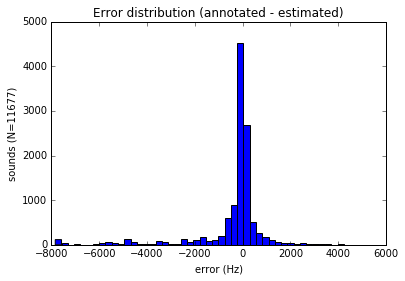

percentage of sound with annotated pitch > estimated pitch: 48.8310353687%

Mean of absolute errors: 682.792596858 Hz, (σ: 1389.03372572 Hz)

Mean distances:
	in Equivalent Rectangular Bandwidths (ERBs):	10.2247152522 ERBs,	(σ: 11.8974391251 ERBs)
	in semitones:					15.40428468 st.,	(σ: 17.3742759831 st.)


In [5]:
print "Mean error: " + str(np.mean(ESS_err)) + " Hz,\t(σ: " + str(np.std(ESS_err)) + " Hz)"
plt.hist(ESS_err, bins=50);
plt.title("Error distribution (annotated - estimated)")
plt.xlabel("error (Hz)")
plt.ylabel("sounds (N=11677)")
plt.show()
N = len(ESS_err)
print "percentage of sound with annotated pitch > estimated pitch: " + str(len(np.where(ESS_err > 0)[0]) / float(N) * 100) + "%\n"
print "Mean of absolute errors: " + str(np.mean(abs(ESS_err))) + " Hz, (σ: " + str(np.std(abs(ESS_err))) + " Hz)\n"

print "Mean distances:"
ESS_ERB = pa.ERBdist(ESS_pTag, ESS_pEst);
print "\tin Equivalent Rectangular Bandwidths (ERBs):\t" + str(np.mean(abs(ESS_ERB))) + " ERBs,\t(σ: " + str(np.std(abs(ESS_ERB))) + " ERBs)"
ESS_st = pa.semitoneDist(ESS_pTag, ESS_pEst);
print "\tin semitones:\t\t\t\t\t" + str(np.mean(abs(ESS_st))) + " st.,\t(σ: " + str(np.std(abs(ESS_st))) + " st.)"

In [6]:
print "Mean absolute error per pack:"
print "\tCarlos Vaquero:\t\t" + str(np.mean(abs(csE_err))) + " Hz,\t(σ: " + str(np.std(abs(csE_err))) + ") Hz"
print "\tgood-sounds:\t\t" + str(np.mean(abs(gsE_err))) + " Hz,\t(σ: " + str(np.std(abs(gsE_err))) + ") Hz"
print "\tModular Samples:\t" + str(np.mean(abs(msE_err))) + " Hz,\t(σ: " + str(np.std(abs(msE_err))) + ") Hz"
print "\tPhilharmonia:\t\t" + str(np.mean(abs(phE_err))) + " Hz,\t(σ: " + str(np.std(abs(phE_err))) + ") Hz"
print "\tIOWA:\t\t\t" + str(np.mean(abs(iwE_err))) + " Hz,\t(σ: " + str(np.std(abs(iwE_err))) + ") Hz\n"

print "Total error:\t\t\t" + str(np.mean(abs(ESS_err))) + " Hz,\t(σ: " + str(np.std(abs(ESS_err))) + ") Hz"

Mean absolute error per pack:
	Carlos Vaquero:		324.560556115 Hz,	(σ: 915.430990078) Hz
	good-sounds:		63.7242028072 Hz,	(σ: 132.896954675) Hz
	Modular Samples:	976.729097772 Hz,	(σ: 1645.59142828) Hz
	Philharmonia:		197.788403323 Hz,	(σ: 541.378087422) Hz
	IOWA:			321.628922631 Hz,	(σ: 693.374528765) Hz

Total error:			682.792596858 Hz,	(σ: 1389.03372572) Hz


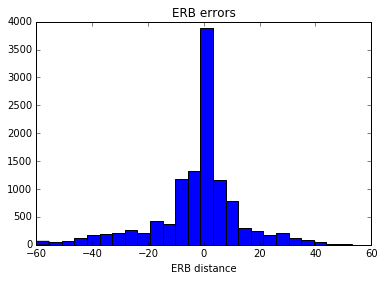

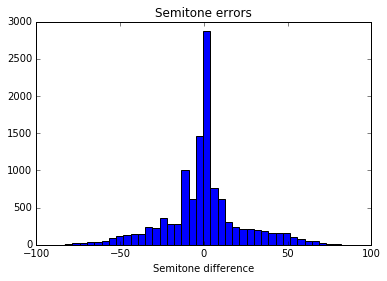

In [7]:
plt.hist(ESS_ERB, bins=25);
plt.title("ERB errors")
plt.xlabel("ERB distance")
plt.show()

plt.hist(ESS_st, bins = 40);
plt.title("Semitone errors")
plt.xlabel("Semitone difference")
plt.show()

In [8]:
i_ERB_gt_1 = np.where(abs(ESS_ERB) > 1)[0]
i_ERB_lt_2 = np.where(abs(ESS_ERB) < 2)[0]
print "Percentage of estimations with an ERB distance less than 2:\t\t" + str(len(i_ERB_lt_2) / float(N) * 100) + "%"

i_st_gt_1 = np.where(abs(ESS_st) >= 1)[0]
i_st_lt_1 = np.where(abs(ESS_st) < 1)[0]
print "Percentage of estimations with semitone distance less than 1:\t\t" + str(len(i_st_lt_1) / float(N) * 100) + "%\n"

i_ERB_gt_mu = np.where(abs(ESS_ERB) >= np.mean(abs(ESS_ERB)))[0]
i_ERB_lt_mu = np.where(abs(ESS_ERB) < np.mean(abs(ESS_ERB)))[0]
print "Percentage of estimations with an ERB distance less than mean:\t\t" + str(len(i_ERB_lt_mu) / float(N) * 100) + "%"

i_st_gt_mu = np.where(abs(ESS_st) >= np.mean(abs(ESS_st)))[0]
i_st_lt_mu = np.where(abs(ESS_st) < np.mean(abs(ESS_st)))[0]
print "Percentage of estimations with semitone distance less than mean:\t" + str(len(i_st_lt_mu) / float(N) * 100) + "%"



Percentage of estimations with an ERB distance less than 2:		24.655305301%
Percentage of estimations with semitone distance less than 1:		19.8081699067%

Percentage of estimations with an ERB distance less than mean:		69.0588336045%
Percentage of estimations with semitone distance less than mean:	65.8388284662%


In [9]:
print "Percentages of correct estimations per pack:"
cs_ERB = pa.ERBdist(csE_pTag, csE_pEst);
cs_i_ERB_lt_2 = np.where(abs(cs_ERB) < 2)[0]; cs_i_ERB_lt_mu = np.where(abs(cs_ERB) < np.mean(abs(cs_ERB)))[0]
gs_ERB = pa.ERBdist(gsE_pTag, gsE_pEst);
gs_i_ERB_lt_2 = np.where(abs(gs_ERB) < 2)[0]; gs_i_ERB_lt_mu = np.where(abs(gs_ERB) < np.mean(abs(gs_ERB)))[0];
ms_ERB = pa.ERBdist(msE_pTag, msE_pEst);
ms_i_ERB_lt_2 = np.where(abs(ms_ERB) < 2)[0]; ms_i_ERB_lt_mu = np.where(abs(ms_ERB) < np.mean(abs(ms_ERB)))[0];
ph_ERB = pa.ERBdist(phE_pTag, phE_pEst);
ph_i_ERB_lt_2 = np.where(abs(ph_ERB) < 2)[0]; ph_i_ERB_lt_mu = np.where(abs(ph_ERB) < np.mean(abs(ph_ERB)))[0];
iw_ERB = pa.ERBdist(iwE_pTag, iwE_pEst);
iw_i_ERB_lt_2 = np.where(abs(iw_ERB) < 2)[0]; iw_i_ERB_lt_mu = np.where(abs(iw_ERB) < np.mean(abs(iw_ERB)))[0];
print "Percentage of ERB < 2:"
print "\tCarlos Vaquero:\t\t" + str(len(cs_i_ERB_lt_2) / float(N) * 100) + "%"
print "\tgood-sounds:\t\t" + str(len(gs_i_ERB_lt_2) / float(N) * 100) + "%"
print "\tModular Samples:\t"  + str(len(ms_i_ERB_lt_2) / float(N) * 100) + "%"
print "\tPhilharmonia:\t\t" + str(len(ph_i_ERB_lt_2) / float(N) * 100) + "%"
print "\tIOWA:\t\t\t" + str(len(iw_i_ERB_lt_2) / float(N) * 100) + "%\n"

print "Percentage of ERB < mean:"
print "\tCarlos Vaquero:\t\t" + str(len(cs_i_ERB_lt_mu) / float(N) * 100) + "%"
print "\tgood-sounds:\t\t" + str(len(gs_i_ERB_lt_mu) / float(N) * 100) + "%"
print "\tModular Samples:\t"  + str(len(ms_i_ERB_lt_mu) / float(N) * 100) + "%"
print "\tPhilharmonia:\t\t" + str(len(ph_i_ERB_lt_mu) / float(N) * 100) + "%"
print "\tIOWA:\t\t\t" + str(len(iw_i_ERB_lt_mu) / float(N) * 100) + "%\n"

cs_st = pa.semitoneDist(csE_pTag, csE_pEst);
cs_i_st_lt_1 = np.where(abs(cs_st) < 2)[0]; cs_i_st_lt_mu = np.where(abs(cs_st) < np.mean(abs(cs_st)))[0]
gs_st = pa.semitoneDist(gsE_pTag, gsE_pEst);
gs_i_st_lt_1 = np.where(abs(gs_st) < 2)[0]; gs_i_st_lt_mu = np.where(abs(gs_st) < np.mean(abs(gs_st)))[0];
ms_st = pa.semitoneDist(msE_pTag, msE_pEst);
ms_i_st_lt_1 = np.where(abs(ms_st) < 2)[0]; ms_i_st_lt_mu = np.where(abs(ms_st) < np.mean(abs(ms_st)))[0];
ph_st = pa.semitoneDist(phE_pTag, phE_pEst);
ph_i_st_lt_1 = np.where(abs(ph_st) < 2)[0]; ph_i_st_lt_mu = np.where(abs(ph_st) < np.mean(abs(ph_st)))[0];
iw_st = pa.semitoneDist(iwE_pTag, iwE_pEst);
iw_i_st_lt_1 = np.where(abs(iw_st) < 2)[0]; iw_i_st_lt_mu = np.where(abs(iw_st) < np.mean(abs(iw_st)))[0];
print "Percentage of st < 1:"
print "\tCarlos Vaquero:\t\t" + str(len(cs_i_st_lt_1) / float(N) * 100) + "%"
print "\tgood-sounds:\t\t" + str(len(gs_i_st_lt_1) / float(N) * 100) + "%"
print "\tModular Samples:\t"  + str(len(ms_i_st_lt_1) / float(N) * 100) + "%"
print "\tPhilharmonia:\t\t" + str(len(ph_i_st_lt_1) / float(N) * 100) + "%"
print "\tIOWA:\t\t\t" + str(len(iw_i_st_lt_1) / float(N) * 100) + "%\n"

print "Percentage of st < mean:"
print "\tCarlos Vaquero:\t\t" + str(len(cs_i_st_lt_mu) / float(N) * 100) + "%"
print "\tgood-sounds:\t\t" + str(len(gs_i_st_lt_mu) / float(N) * 100) + "%"
print "\tModular Samples:\t"  + str(len(ms_i_st_lt_mu) / float(N) * 100) + "%"
print "\tPhilharmonia:\t\t" + str(len(ph_i_st_lt_mu) / float(N) * 100) + "%"
print "\tIOWA:\t\t\t" + str(len(iw_i_st_lt_mu) / float(N) * 100) + "%\n"





Percentages of correct estimations per pack:
Percentage of ERB < 2:
	Carlos Vaquero:		1.26744883104%
	good-sounds:		0.590905198253%
	Modular Samples:	6.17453112957%
	Philharmonia:		14.6698638349%
	IOWA:			1.95255630727%

Percentage of ERB < mean:
	Carlos Vaquero:		2.54346150552%
	good-sounds:		0.590905198253%
	Modular Samples:	38.8712854329%
	Philharmonia:		21.7264708401%
	IOWA:			3.87942108418%

Percentage of st < 1:
	Carlos Vaquero:		1.43872570009%
	good-sounds:		0.685107476235%
	Modular Samples:	6.38862721589%
	Philharmonia:		16.5710370814%
	IOWA:			2.14096086324%

Percentage of st < mean:
	Carlos Vaquero:		2.42356769718%
	good-sounds:		0.685107476235%
	Modular Samples:	35.3087265565%
	Philharmonia:		21.2640232937%
	IOWA:			3.69101652822%



### 2.2.2: Confidence and Salience
The pitch estimation algorithm also gives a confidence measurement, ideally this would be a predictor for the estimation errors. Also the Freesound extractor calculates a salience measurement, which will indicate how much tonal information the signal contains. In theory this could also be a predictor for the succes of the pitch estimation algorithm.

Mean confidence:	0.759112979937, (σ: 0.196972893496)
Mean salience:		0.441896765561, (σ: 0.161220811628)


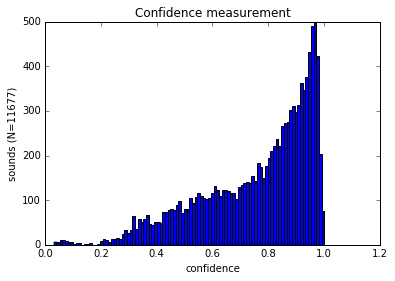

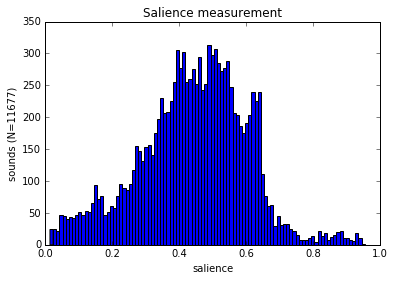

In [10]:
print "Mean confidence:\t" + str(np.mean(ESS_conf)) + ", (σ: " + str(np.std(ESS_conf)) + ")"
print "Mean salience:\t\t" + str(np.mean(ESS_sal)) + ", (σ: " + str(np.std(ESS_sal)) + ")"

plt.hist(ESS_conf, bins = 100)
plt.title("Confidence measurement")
plt.xlabel("confidence")
plt.ylabel("sounds (N=11677)")
plt.show()

plt.hist(ESS_sal, bins = 100)
plt.title("Salience measurement")
plt.xlabel("salience")
plt.ylabel("sounds (N=11677)")
plt.show()


### 2.2.3: Octave errors:
The octave errors do not add much to the overall error:

In [11]:
print "Octave errors:"
octErr = pa.isOctErr(ESS_pTag, ESS_pEst)
print "percentage of octave errors: " + str(len(np.where(octErr != 0)[0]) / float(len(ESS_pTag)) * 100) + "%"
i_XoctErr = np.where(octErr == 0);
print "Mean of absolute errors:" 
print "\tincluding octave errors:\t"+ str(np.mean(abs(ESS_err))) + " Hz,\t(σ: " + str(np.std(abs(ESS_err))) + " Hz)"
print "\texcluding octave errors:\t" + str(np.mean(abs(ESS_err[i_XoctErr]))) + " Hz,\t(σ: " + str(np.std(abs(ESS_err[i_XoctErr]))) + " Hz)"

Octave errors:
percentage of octave errors: 4.76149695984%
Mean of absolute errors:
	including octave errors:	682.792596858 Hz,	(σ: 1389.03372572 Hz)
	excluding octave errors:	682.688411207 Hz,	(σ: 1403.2101436 Hz)


## 2.3: Predictors:
What values can predict the error rates?

### 2.3.1: Confidence, salience and annotated pitch:

Confidence:
Percentage of sounds with a confidence above mean confidence: 60.0068510748%


ValueError: could not convert string to float: tP

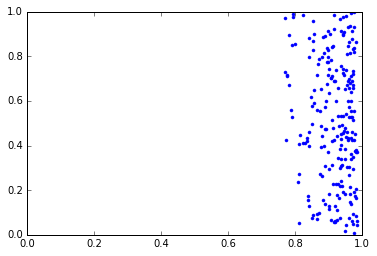

In [12]:
print "Confidence:"
i_hiConf = np.where(ESS_conf > np.mean(ESS_conf))[0]
print "Percentage of sounds with a confidence above mean confidence: " + str(len(i_hiConf) / float(N) * 100) + "%"

pa.predict(ESS_conf, ESS_err, plot=1);

In [175]:
print "Salience:"

Salience:


In [176]:
print "Annotated pitch:"

Annotated pitch:


### 2.3.2: Descriptors:

In [21]:

print "Mean absulute error per pack:"
print "\tCarlos Vaquero (freesound):\t" + str(np.mean(abs(csJ_err))) + " Hz, (σ: " + str(np.std(abs(csJ_err))) + ") Hz"
print "\tCarlos Vaquero (local):\t\t" + str(np.mean(abs(csE_err))) + " Hz, (σ: " + str(np.std(abs(csE_err))) + ") Hz"
print "\tgood-sounds (freesound):\t" + str(np.mean(abs(gsJ_err))) + " Hz, (σ: " + str(np.std(abs(gsJ_err))) + ") Hz"
print "\tgood-sounds (local):\t\t" + str(np.mean(abs(gsE_err))) + " Hz, (σ: " + str(np.std(abs(gsE_err))) + ") Hz"
print "\tModular Samples (freesound):\t" + str(np.mean(abs(msJ_err))) + " Hz, (σ: " + str(np.std(abs(msJ_err))) + ") Hz"
print "\tModular Samples (local):\t" + str(np.mean(abs(msE_err))) + " Hz, (σ: " + str(np.std(abs(msE_err))) + ") Hz"
print "\tPhilharmonia (local):\t\t" + str(np.mean(abs(phE_err))) + " Hz, (σ: " + str(np.std(abs(phE_err))) + ") Hz"
print "\tIOWA (local):\t\t\t" + str(np.mean(abs(iwE_err))) + " Hz, (σ: " + str(np.std(abs(iwE_err))) + ") Hz\n"


print "Total mean error (freesound):\t\t" + str(np.mean(abs(frsJSON_err))) + " Hz, (σ: " + str(np.std(abs(frsJSON_err))) + ") Hz"
print "Total mean error (local):\t\t" + str(np.mean(abs(ESS_err))) + " Hz, (σ: " + str(np.std(abs(ESS_err))) + ") Hz"

Mean absulute error per pack:
	Carlos Vaquero (freesound):	328.652712702 Hz, (σ: 914.870811522) Hz
	Carlos Vaquero (local):		324.560556115 Hz, (σ: 915.430990078) Hz
	good-sounds (freesound):	66.7469563208 Hz, (σ: 127.071695262) Hz
	good-sounds (local):		63.7242028072 Hz, (σ: 132.896954675) Hz
	Modular Samples (freesound):	992.896007262 Hz, (σ: 1656.35199494) Hz
	Modular Samples (local):	976.729097772 Hz, (σ: 1645.59142828) Hz
	Philharmonia (local):		197.788403323 Hz, (σ: 541.378087422) Hz
	IOWA (local):			321.628922631 Hz, (σ: 693.374528765) Hz

Total mean error (freesound):		938.724572408 Hz, (σ: 1619.75750756) Hz
Total mean error (local):		682.792596858 Hz, (σ: 1389.03372572) Hz


The overal mean of the raw errors (calculated by subtracting the annotated pitch from the estimated pitch) in Herz is: $MU_ERR$

In [15]:
print "Mean error per pack:"
print "\tCarlos Vaquero (freesound):\t" + str(np.mean(csJ_err)) + " Hz,\t(σ: " + str(np.std(csJ_err)) + ") Hz"
print "\tCarlos Vaquero (local):\t\t" + str(np.mean(csE_err)) + " Hz,\t(σ: " + str(np.std(csE_err)) + ") Hz"
print "\tgood-sounds (freesound):\t" + str(np.mean(gsJ_err)) + " Hz,\t(σ: " + str(np.std(gsJ_err)) + ") Hz"
print "\tgood-sounds (local):\t\t" + str(np.mean(gsE_err)) + " Hz,\t(σ: " + str(np.std(gsE_err)) + ") Hz"
print "\tModular Samples (freesound):\t" + str(np.mean(msJ_err)) + " Hz,\t(σ: " + str(np.std(msJ_err)) + ") Hz"
print "\tModular Samples (local):\t" + str(np.mean(msE_err)) + " Hz,\t(σ: " + str(np.std(msE_err)) + ") Hz"
print "\tPhilharmonia (local):\t\t" + str(np.mean(phE_err)) + " Hz,\t(σ: " + str(np.std(phE_err)) + ") Hz"
print "\tIOWA (local):\t\t\t" + str(np.mean(iwE_err)) + " Hz,\t(σ: " + str(np.std(iwE_err)) + ") Hz\n"


print "Total error (freesound):\t\t" + str(np.mean(frsJSON_err)) + " Hz,\t(σ: " + str(np.std(frsJSON_err)) + ") Hz"
print "Total error (local):\t\t\t" + str(np.mean(ESS_err)) + " Hz,\t(σ: " + str(np.std(ESS_err)) + ") Hz"

Mean error per pack:
	Carlos Vaquero (freesound):	-267.298342078 Hz,	(σ: 934.640467594) Hz
	Carlos Vaquero (local):		-268.133910572 Hz,	(σ: 933.518965089) Hz
	good-sounds (freesound):	-28.7228805065 Hz,	(σ: 140.63203067) Hz
	good-sounds (local):		-25.1533312318 Hz,	(σ: 145.222878753) Hz
	Modular Samples (freesound):	-615.318041635 Hz,	(σ: 1830.49941819) Hz
	Modular Samples (local):	-751.97894797 Hz,	(σ: 1948.46750954) Hz
	Philharmonia (local):		39.6355089434 Hz,	(σ: 575.012619393) Hz
	IOWA (local):			-270.678372841 Hz,	(σ: 714.805301805) Hz

Total error (freesound):		-585.447409796 Hz,	(σ: 1778.22089081) Hz
Total error (local):			-472.501628519 Hz,	(σ: 1612.05506027) Hz
